In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import json
path = 'datasets/bitly_usagov/example.txt'
records = [json.loads(line) for line in open(path)]

In [3]:
# pure Python time zone counter
time_zones = [rec['tz'] for rec in records if 'tz' in rec] # avoiding emptys

from collections import defaultdict
def get_counts2(sequence):
    '''sequence counter function'''
    counts = defaultdict(int) # null init
    for x in sequence:
        counts[x] += 1
    return counts

counts = get_counts2(time_zones)

from collections import Counter
counts = Counter(time_zones)
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

# Pandas time zone counter

In [4]:
frame = pd.DataFrame(records)
frame

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3555,Mozilla/4.0 (compatible; MSIE 9.0; Windows NT ...,US,1.0,America/New_York,NJ,e5SvKE,fqPSr9,tweetdeckapi,en,1.usa.gov,direct,http://www.fda.gov/AdvisoryCommittees/Committe...,1.331927e+09,1.301298e+09,Paramus,"[40.9445, -74.07]",NaN,NaN
3556,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,US,0.0,America/Chicago,OK,jQLtP4,jQLtP4,bitly,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,http://www.okc.gov/PublicNotificationSystem/Fo...,1.331927e+09,1.307530e+09,Oklahoma City,"[35.4715, -97.518997]",NaN,NaN
3557,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331927e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
3558,GoogleProducer,US,0.0,America/Los_Angeles,CA,zjtI4X,zjtI4X,bitly,NaN,1.usa.gov,direct,http://www.ahrq.gov/qual/qitoolkit/,1.331927e+09,1.327529e+09,Mountain View,"[37.419201, -122.057404]",NaN,NaN


In [5]:
tz_counts = frame['tz'].value_counts()
tz_counts.head(10)

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

<IPython.core.display.Javascript object>


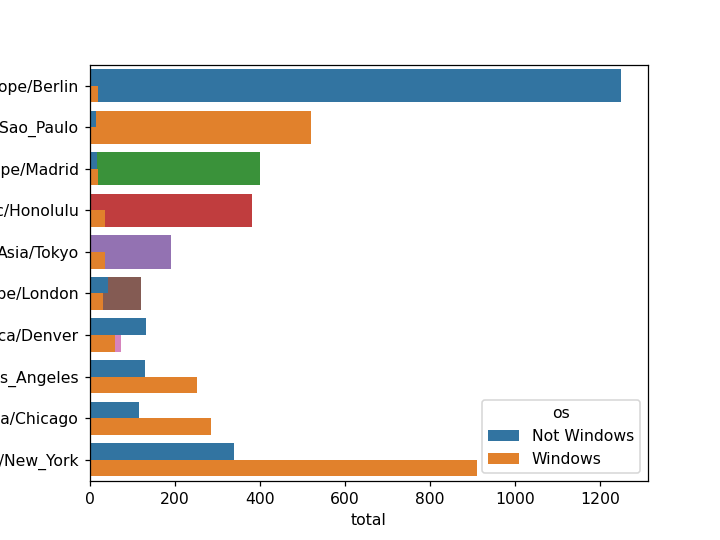

<AxesSubplot: >

In [6]:
clean_tz = frame['tz'].fillna('Missing')
clean_tz[clean_tz == ''] = 'Unknown'
tz_counts = clean_tz.value_counts()

ploting_set = tz_counts[:10]
sns.barplot(y=ploting_set.index, x=ploting_set.values)

In [7]:
# выделение информации из столбца а
results = pd.Series([x.split()[0] for x in frame.a.dropna()])
results

0                  Mozilla/5.0
1       GoogleMaps/RochesterNY
2                  Mozilla/4.0
3                  Mozilla/5.0
4                  Mozilla/5.0
                 ...          
3435               Mozilla/4.0
3436               Mozilla/5.0
3437    GoogleMaps/RochesterNY
3438            GoogleProducer
3439               Mozilla/4.0
Length: 3440, dtype: object

In [8]:
results.value_counts().head(10)

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
BlackBerry8520/5.0.0.592       3
Dalvik/1.4.0                   3
dtype: int64

In [9]:
#сокращение размера фрейма, путем удаления устрок с пустым значением а
cframe = frame[frame.a.notnull()]
cframe.head()

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN


In [10]:
operating_system = np.where(cframe['a'].str.contains('Windows'), 'Windows', 'Not Windows')
operating_system[:5]

array(['Windows', 'Not Windows', 'Windows', 'Not Windows', 'Windows'],
      dtype='<U11')

In [11]:
pd.Series.str.contains?

In [12]:
len(cframe)

3440

In [13]:
by_tz_os = cframe.groupby(['tz', operating_system])

In [14]:
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts 

,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
...,...,...
Europe/Volgograd,0.0,1.0
Europe/Warsaw,1.0,15.0
Europe/Zurich,4.0,0.0


In [15]:
indexer = agg_counts.sum(1).argsort()
count_subset = agg_counts.take(indexer)
count_subset

,Not Windows,Windows
tz,,
America/Mazatlan,1.0,0.0
America/La_Paz,0.0,1.0
America/Lima,0.0,1.0
Europe/Volgograd,0.0,1.0
Europe/Sofia,0.0,1.0
...,...,...
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0


In [16]:
count_subset = count_subset.stack()
count_subset.name = 'total'

In [17]:
count_subset = count_subset.reset_index()

In [18]:
count_subset

,tz,level_1,total
0,America/Mazatlan,Not Windows,1.0
1,America/Mazatlan,Windows,0.0
2,America/La_Paz,Not Windows,0.0
3,America/La_Paz,Windows,1.0
4,America/Lima,Not Windows,0.0
...,...,...,...
189,America/Chicago,Windows,285.0
190,,Not Windows,245.0
191,,Windows,276.0
192,America/New_York,Not Windows,339.0


In [19]:
count_subset.rename(columns={'level_1':'os'}, inplace=True)

In [139]:
count_subset2 = count_subset.copy()

In [171]:
# i was realy lazy about that))
count_subset2.at[190,'tz'],count_subset2.at[191,'tz'] = 'Unknown/Unknown','Unknown/Unknown' #mb good rename can be 'rest of the world'

TypeError: unhashable type: 'slice'

In [144]:
sns.barplot(x='total', y='tz', hue='os', data=count_subset2.tail(20))

<AxesSubplot: xlabel='total', ylabel='tz'>

In [145]:
world = count_subset2.tz.str.split(r'/').str[0]

In [146]:
count_subset2.head(5)

,tz,os,total
0,America/Mazatlan,Not Windows,1.0
1,America/Mazatlan,Windows,0.0
2,America/La_Paz,Not Windows,0.0
3,America/La_Paz,Windows,1.0
4,America/Lima,Not Windows,0.0


In [147]:
grouped = count_subset2.groupby([world, count_subset2.os]).agg('sum').reset_index()

C:\Users\g.ermolaev\AppData\Local\Temp\ipykernel_2040\69644798.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = count_subset2.groupby([world, count_subset2.os]).agg('sum').reset_index()


In [148]:
grouped

,tz,os,total
0,Africa,Not Windows,0.0
1,Africa,Windows,8.0
2,America,Not Windows,794.0
3,America,Windows,1618.0
4,Asia,Not Windows,21.0
5,Asia,Windows,87.0
6,Australia,Not Windows,5.0
7,Australia,Windows,2.0
8,Chile,Not Windows,5.0
9,Chile,Windows,1.0


<IPython.core.display.Javascript object>


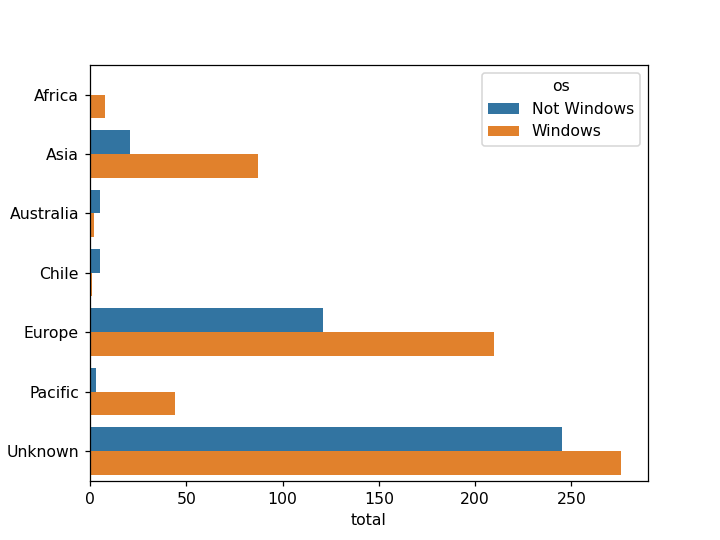

<AxesSubplot: xlabel='total', ylabel='tz'>

In [149]:
sns.barplot(x ='total', y='tz', hue='os', data=grouped[grouped.tz!='America']) # america ne vlazit, vmesto nee` proliv

In [131]:
# for americo vispuchi
def norm_total(group):
    group['normed_total'] = group.total / group.total.sum()
    return group

In [167]:
results = grouped.groupby('tz',group_keys=False).apply(norm_total)
results.rename(columns = {'tz': 'world_part'}, inplace=True)

<IPython.core.display.Javascript object>


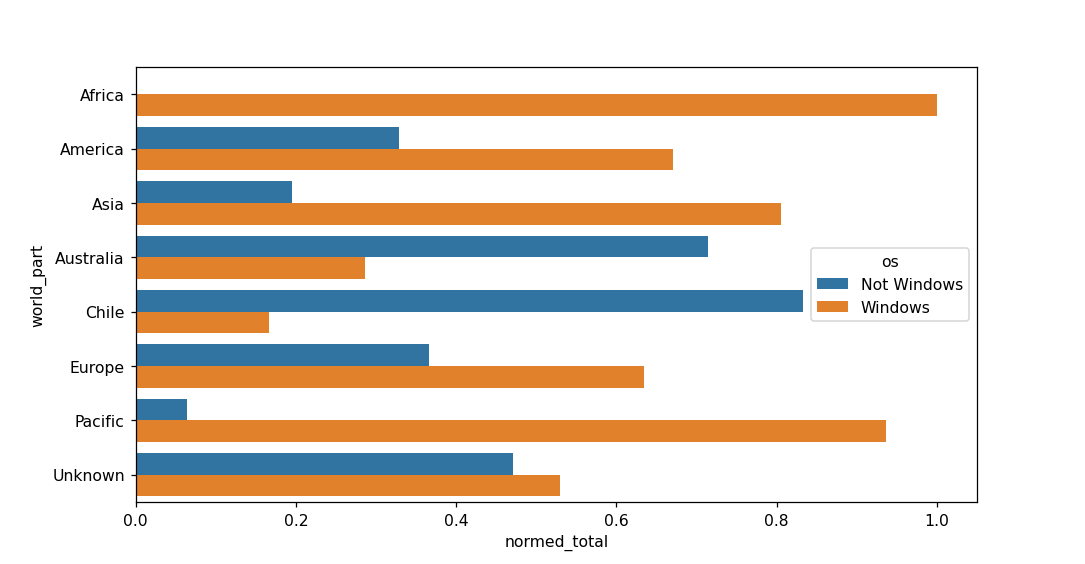

<AxesSubplot: xlabel='normed_total', ylabel='world_part'>

In [168]:
#nice informative imprecive extrodenaty data analisys GRAPH in percents
sns.barplot(x='normed_total', y='world_part', hue='os',  data=results)